In [84]:
# coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from sklearn import preprocessing
from scipy.interpolate import interp1d
import pickle
import cv2

In [85]:
#讀入 dataset
cameraNo = 1#1#12 #10 #3
img_w = 1280#1280 #704 #新的camera是寬畫面，這邊設置不同
img_h = 360#360 #576

debug_show_image = True

data = np.loadtxt('data/tracks%d.csv' % cameraNo, dtype=np.int, delimiter=',') # 從 deep sort 出來的
#data = np.loadtxt('data/tracks_camera3.csv', dtype=np.int, delimiter=',') # 直接從 cvat 標記檔出來的
#data = np.loadtxt('data/tracks_camera14.csv', dtype=np.int, delimiter=',')#對 camera14 測試
print(data)
print(data.shape)

[[   1    2  926 ...    0    0    0]
 [   2    2  816 ...   64   45 7575]
 [   1    3  852 ...    0    0    0]
 ...
 [1275    3  814 ...    0    0    0]
 [ 646    2   38 ...    0    0    0]
 [1277    3  876 ...    0    0    0]]
(1149, 36372)


In [86]:
#網頁用的imshow，用matplotlib畫圖
def imshow(title, image):
    plt.figure(figsize = (20,20))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    


In [87]:
#測試，如果以前已經有路口對應參考點，在這邊show出

path_prefix = "C:/Users/leo_1/Downloads/"
trackDataPath = path_prefix + "road_camera%d.csv" % cameraNo
road_points = np.loadtxt(trackDataPath, dtype=np.float64,delimiter=',')
trackDataPath = path_prefix + "road_end_camera%d.csv" % cameraNo
road_end_points = np.loadtxt(trackDataPath, dtype=np.float64,delimiter=',')
print(road_points)
print(road_end_points)
if debug_show_image:
    mat = cv2.imread("output/temp%d.png" % cameraNo)
    x = (int)(road_points[0][0])
    y = (int)(road_points[0][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "R" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_points[1][0])
    y = (int)(road_points[1][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "L" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_points[2][0])
    y = (int)(road_points[2][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "U" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_points[3][0])
    y = (int)(road_points[3][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "D" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)

    imshow("road_in_points", mat)
    
    mat = cv2.imread("output/temp%d.png" % cameraNo)
    x = (int)(road_end_points[0][0])
    y = (int)(road_end_points[0][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "R" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_end_points[1][0])
    y = (int)(road_end_points[1][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "L" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_end_points[2][0])
    y = (int)(road_end_points[2][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "U" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_end_points[3][0])
    y = (int)(road_end_points[3][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "D" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    imshow("road_end_points", mat)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

[[1137.       125.45453]
 [  72.51184   80.14615]
 [ 411.5212    26.     ]
 [  91.62484  331.50043]]
[[1136.1309    170.02785 ]
 [  68.0767     59.338814]
 [ 421.79877    26.      ]
 [  44.038082  283.5761  ]]


In [88]:
class Car:
    def __init__(self, carID = 0, carType = 2):
        self.carType = carType #車種
        self.carID = carID #車種
        self.tracks = [] #軌跡紀錄，格式暫定為[[x1,y1],[x2,y2],[x3,y3]....]
        #以後根據情況看要不要擴充車子長寬/出現時間點等等數值進去
        self.clusterType = 0
        self.lastFrame = 0#紀錄最後一次更新時的frame
        return

    def add(self, x, y, w, h, frameID):
        #幾乎沒移動時不計算
        self.tracks.append(np.array([x, y, w, h, frameID]))
        #if len(self.tracks) > 0:
        #    last = self.tracks[len(self.tracks) - 1]
        #    d = (last[0] - x) * (last[0] - x) + (last[1] - y) * (last[1] - y)
        #    if d > 400:
        #        self.tracks.append(np.array([x, y, w, h, frameID]))
        #else:
        #    self.tracks.append(np.array([x, y, w, h, frameID]))
        return

    def getAngle(self, v1, v2):
        #向量求夾角，來源 https://www.it145.com/9/94136.html
        x1 = v1[0]
        y1 = v1[1]
        x2 = v2[0]
        y2 = v2[1]
        theta = np.arctan2(x1 * y2 - y1 * x2, x1 * x2 + y1 * y2)
        return theta * 180 / np.pi
    
    def predict(self):
        result = -1
        result2 = -1
        if len(self.tracks) > 10:
            size = len(self.tracks)
            
            #計算前 n 點向量
            vector1 = self.tracks[getLength] - self.tracks[0]
            #計算後 n 點向量
            vector2 = self.tracks[size - 1] - self.tracks[size - 1 - getLength]
            angle = self.getAngle(vector1, vector2)
            if abs(angle) > 150: #除了左右轉，還有迴轉車
                result = 3 #"trunBack"
            elif angle < -trunGate:
                result = 1 #"trunLeft"
            elif angle > trunGate:
                result = 2 #"trunRight"
            else:
                result = 0 #"straight"
            #print(angle)
            
            #路口計算，目前先寫死，以後看看有沒有辦法自動化
            #對應camera3，由下往上
            #vectorRoad = np.array([-5, -1])
            #對應camera14
            #vectorRoad = np.array([13, -35])
            #觀察進入向量與第一個路口向量的夾角
            inAngle = self.getAngle(vector1, vectorRoad)
            #print(inAngle)
            if abs(inAngle) < roadGate: #路口1，正向
                result2 = 0 #"road1_A" 
            elif abs(inAngle) > 150: #路口1，反向
                result2 = 1 #"road1_B"
            elif inAngle >= roadGate:
                result2 = 2 #"road2_A"
            else:
                result2 = 3 #"road2_B"
        return result, result2


In [89]:
#外插法，參照 https://qcloud.fun/2020/04/10/python-linear-interpolate/

def extrapolate(points, minX=0, minY=0, maxX=704, maxY=576):
    #目標是外插到畫面邊緣，也就是 x = 0或704 時 y 在 0~576之間
    #或者 y = 0或576時 x在0~704之間
    xarr = []
    yarr = []
    for i in range(len(points)):
        xarr.append(points[i][0])
        yarr.append(points[i][1])

    if xarr[0] == xarr[1] and yarr[0] == yarr[1]:
        return [xarr[0], yarr[0]]
        
    fy = interp1d(xarr, yarr, fill_value='extrapolate')
    fx = interp1d(yarr, xarr, fill_value='extrapolate')
    tarX = minX
    tarY = minY
    if xarr[0] < xarr[-1]:
        #起始點x比較小，往左邊外插
        tarX = minX
        tarY = fy(tarX).tolist()
    else: 
        #往右邊外插
        tarX = maxX
        tarY = fy(tarX).tolist()
    if (tarY > maxY) or (tarY < 0):
        # y出界了，反過來外插x
        if yarr[0] < yarr[-1]:
            #起始點y比較小，往上方外插
            tarY = minY
            tarX = fx(tarY).tolist()
        else:
            tarY = maxY
            tarX = fx(tarY).tolist()
    
    tarX = max(minX, tarX)
    tarX = min(maxX, tarX)
    tarY = max(minY, tarY)
    tarY = min(maxY, tarY)
    return [tarX, tarY]

print(extrapolate([[1, 2], [3, 4], [6, 7], [8, 9], [9, 10]]))
print(extrapolate([[3, 2], [5, 4], [9, 7], [11, 9], [15, 10]]))
print(extrapolate([[5, 6], [3, 4], [1, 2]]))

[0, 1.0]
[1.0, 0]
[575.0, 576]


In [90]:
test_road_points = [[698.97437, 182.46745], 
                                    [409.28937,538.0], 
                                    [5.2457047,178.84816], 
                                    [699.0,273.52292]]
max(np.array(test_road_points)[:,0])

699.0

In [91]:
carList = {}
for i in range(len(data)):
    line = data[i]
    car = Car(line[0], line[1])
    for j in range(2, len(line), 5):
        if line[j+4] == 0:
            break
        car.add(line[j], line[j+1], line[j+2], line[j+3], line[j+4])
    carList[(car.carID, car.carType)] = car

#把所有路徑的起點/終點抓出來
startX = []
startY = []
endX = []
endY = []
skipNum = 0
for key, car in carList.items():
    #20220726發現換yolov7後偵測變準了，行人抓很多，如果不把行人濾掉，路口計算會往斑馬線歪過去(被行人干擾)
    if car.carType == 4:
        skipNum += 1
        continue
    startX.append(car.tracks[0][0] + car.tracks[0][2] // 2)
    startY.append(car.tracks[0][1] + car.tracks[0][3] // 2)
    endX.append(car.tracks[-1][0] + car.tracks[-1][2] // 2)
    endY.append(car.tracks[-1][1] + car.tracks[-1][3] // 2)
print("skip %d people" % skipNum)
minStartX = min(startX)
minStartY = min(startY)
maxStartX = max(startX)
maxStartY = max(startY)
minEndX = min(endX)
minEndY = min(endY)
maxEndX = max(endX)
maxEndY = max(endY)

# RuntimeWarning: divide by zero encountered in true_divide
minStartX = max(minStartX, 0)
minStartY = max(minStartY, 0)
minEndX = max(minEndX, 0)
minEndY = max(minEndY, 0)


print("%d, %d, %d, %d" % (minStartX, minStartY, maxStartX, maxStartY))
print("%d, %d, %d, %d" % (minEndX, minEndY, maxEndX, maxEndY))


# Show圖用
if debug_show_image:
    mat = cv2.imread("output/temp%d.png" % cameraNo)
    cv2.rectangle(mat, (minStartX, minStartY), (maxStartX, maxStartY), (255, 0, 0), 1)
    cv2.rectangle(mat, (minEndX, minEndY), (maxEndX, maxEndY), (0, 255, 0), 1)
        
    imshow("point range", mat)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()


skip 182 people
24, 9, 1103, 344
11, 9, 1102, 343


340
234


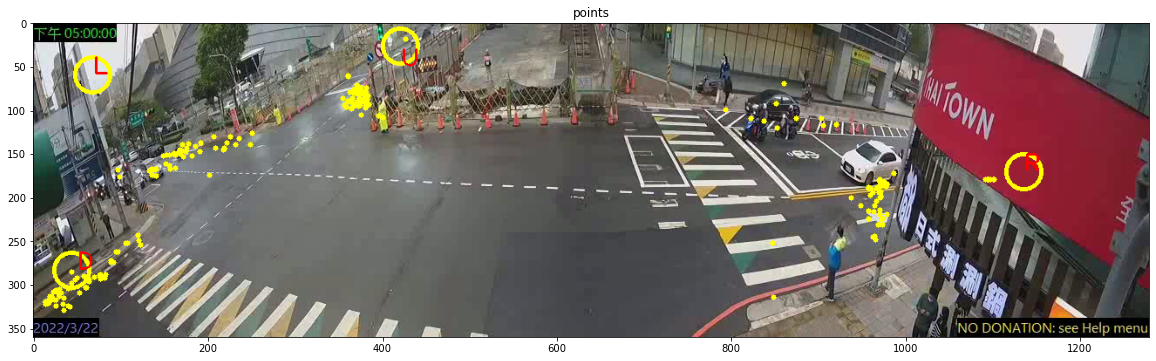

In [100]:
X = []
X_startPoint = []
X_endPoint = []
getLength = 5

#i = 0
for key, car in carList.items():
    #i+=1
    #if i > 4:
    #    break
    if car.carType == 4:
        skipNum += 1
        continue
    trackLength = len(car.tracks)
    track = car.tracks[0]
    start_xc = track[0] + track[2] // 2
    start_yc = track[1] + track[3] // 2
    track = car.tracks[trackLength - 1]
    end_xc = track[0] + track[2] // 2
    end_yc = track[1] + track[3] // 2
    angle = 0
    angle2 = 0
    if trackLength > 10:
        # 起點外插修正
        temp_track = car.tracks[getLength]
        temp_xc = temp_track[0] + temp_track[2] // 2
        temp_yc = temp_track[1] + temp_track[3] // 2
        #print([[start_xc, start_yc], [temp_xc, temp_yc]])
        if start_xc == temp_xc and start_yc == temp_yc:
            #完全不動的車不計算
            start_xc = 0
            start_yc = 0
        else:
            extraPoint = extrapolate([[start_xc, start_yc], [temp_xc, temp_yc]], minStartX, minStartY, maxStartX, maxStartY)
            start_xc = extraPoint[0]
            start_yc = extraPoint[1]
        #print([[start_xc, start_yc], [temp_xc, temp_yc]])
        vector1 = [temp_xc - start_xc, temp_yc - start_yc]
        
        # 終點外插修正
        temp_track = car.tracks[trackLength - 1 - getLength]
        temp_xc = temp_track[0] + temp_track[2] // 2
        temp_yc = temp_track[1] + temp_track[3] // 2
        #print([[end_xc, end_yc], [temp_xc, temp_yc]])
        if end_xc == temp_xc and end_yc == temp_yc:
            #完全不動的車不計算
            end_xc = 0
            end_yc = 0
        else:
            extraPoint = extrapolate([[end_xc, end_yc], [temp_xc, temp_yc]], minEndX, minEndY, maxEndX, maxEndY)
            end_xc = extraPoint[0]
            end_yc = extraPoint[1]
        #print([[end_xc, end_yc], [temp_xc, temp_yc]])
        vector2 = [end_xc - temp_xc, end_yc - temp_yc]
        
        angle = car.getAngle(vector1, vector2)
        angle2 = car.getAngle([1, 0], vector1)
        X.append([start_xc, start_yc, end_xc, end_yc, angle, angle2])
        #改為起點/終點分別分群
        X_startPoint.append([start_xc, start_yc])
        X_endPoint.append([end_xc, end_yc])
    else:
        #路徑點數小於10的會影響準確度，值都給0讓它自成一群
        X.append([0, 0, 0, 0, 0, 0])
        X_startPoint.append([0, 0])
        X_endPoint.append([0, 0])
X = np.array(X).astype(np.float32)
X_startPoint = np.array(X_startPoint).astype(np.float32)
X_endPoint = np.array(X_endPoint).astype(np.float32)
#X = preprocessing.scale(X)
#print(X)
if debug_show_image:
    mat = cv2.imread("output/temp%d.png" % cameraNo)
    #for i in range(len(X_startPoint)):
    #    cv2.circle(mat, (int(X_startPoint[i][0]), int(X_startPoint[i][1])), 2, (255, 255, 0), 1)
    #    cv2.circle(mat, (int(X_endPoint[i][0]), int(X_endPoint[i][1])), 2, (0, 255, 255), 1)
    
    '''
    x = (int)(road_points[0][0])
    y = (int)(road_points[0][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "R" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_points[1][0])
    y = (int)(road_points[1][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "L" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_points[2][0])
    y = (int)(road_points[2][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "U" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_points[3][0])
    y = (int)(road_points[3][1])
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "D" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    '''
    
    #'''
    x = (int)(road_end_points[0][0])
    y = (int)(road_end_points[0][1])
    cv2.circle(mat, (x, y), 20, (0, 255, 255), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "R" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_end_points[1][0])
    y = (int)(road_end_points[1][1])
    cv2.circle(mat, (x, y), 20, (0, 255, 255), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "L" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_end_points[2][0])
    y = (int)(road_end_points[2][1])
    cv2.circle(mat, (x, y), 20, (0, 255, 255), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "U" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = (int)(road_end_points[3][0])
    y = (int)(road_end_points[3][1])
    cv2.circle(mat, (x, y), 20, (0, 255, 255), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "D" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    #'''

    counts = 0
    counts_total = 0 
    for key, car in carList.items():
        trackLength = len(car.tracks)
        if trackLength <= 20:
            continue
        track = car.tracks[0]
        start_xc = track[0] + track[2] // 2
        start_yc = track[1] + track[3] // 2
        track = car.tracks[trackLength - 1]
        end_xc = track[0] + track[2] // 2
        end_yc = track[1] + track[3] // 2
        if car.carType == 4:
            continue
        counts_total += 1
        
        startPoint = np.array([start_xc, start_yc])
        minDiff = np.linalg.norm(startPoint - road_points[0])
        result2 = 0
        for i in range(len(road_points)):
            tarDiff = np.linalg.norm(startPoint - road_points[i])
            if tarDiff < minDiff:
                minDiff = tarDiff
                result2 = i
        if result2 == 0:#右入
            if minDiff > 600:
                continue
        elif result2 == 1:#左入
            if minDiff > 200:
                continue
        else: #左、上、下
            if minDiff > 120:
                continue
        #'''
        endRoad = 0
        endPoint = np.array([end_xc, end_yc])
        minDiff = np.linalg.norm(endPoint - road_end_points[0])

        for i in range(len(road_end_points)):
            tarDiff = np.linalg.norm(endPoint - road_end_points[i])
            if tarDiff < minDiff:
                minDiff = tarDiff
                endRoad = i
        if endRoad == 0:#右入
            if minDiff > 600:
                continue
        elif endRoad == 1:#左入
            if minDiff > 200:
                continue
        else: #左、上、下
            if minDiff > 100:
                continue
        #'''
        if (start_xc - end_xc) * (start_xc - end_xc) + (start_yc - end_yc) * (start_yc - end_yc) > -40000:
            #cv2.circle(mat, (int(start_xc), int(start_yc)), 3, (255, 255, 0), -1)
            cv2.circle(mat, (int(end_xc), int(end_yc)), 3, (0, 255, 255), -1)
            #cv2.line(mat, (int(start_xc), int(start_yc)), (int(end_xc), int(end_yc)), (255, 0, 0), 1)
            counts += 1
    print(counts_total)
    print(counts)
            
        
    imshow("points", mat)

In [19]:
from sklearn.cluster import KMeans
# 分類改為分5類 (上/下/左/右/雜點)
#n = 5
# 效果不好，雜點沒有自成一群而是分散到各類別，改分4類
#n = 4 #更慘...會兩個路口混淆
n = 8 #20220726換yolov7後，新cctv的camera分到8類才把左邊與下方路口分開
km = KMeans(n_clusters=n, init='k-means++', random_state=1234)
predictY_startPoint = km.fit_predict(X_startPoint)
print(predictY_startPoint)
with open('data/clustering_startPoint_camera%d.pickle' % cameraNo, 'wb') as f:
    pickle.dump(km, f)
    
km = KMeans(n_clusters=n, init='k-means++', random_state=1234)
predictY_endPoint = km.fit_predict(X_endPoint)
print(predictY_endPoint)
with open('data/clustering_endPoint_camera%d.pickle' % cameraNo, 'wb') as f:
    pickle.dump(km, f)

[0 0 1 ... 3 1 0]
[1 0 4 ... 4 0 0]


In [20]:
#測試，從 pickle 讀取模型
#哇 AgglomerativeClustering 沒 predict...好吧改用k-means++
#print(X)
#print(X[0:2,:])
with open('data/clustering_startPoint_camera%d.pickle' % cameraNo, 'rb') as f:
    modelStart = pickle.load(f)
    predictY_startPoint = modelStart.predict(X_startPoint[0:1,:])
    print(predictY_startPoint)
    predictY_startPoint = modelStart.predict(X_startPoint)
    print(predictY_startPoint)
    
with open('data/clustering_endPoint_camera%d.pickle' % cameraNo, 'rb') as f:
    modelEnd = pickle.load(f)
    predictY_endPoint = modelEnd.predict(X_endPoint[0:1,:])
    print(predictY_endPoint)
    predictY_endPoint = modelEnd.predict(X_endPoint)
    print(predictY_endPoint)

[0]
[0 0 1 ... 3 1 0]
[1]
[1 0 4 ... 4 0 0]


In [21]:
#print(X_startPoint)
predictY_startPoint = predictY_startPoint.reshape((-1,1))
#print(predictY_startPoint)
predictY_endPoint = predictY_endPoint.reshape((-1,1))
#print(predictY_endPoint)

#out= np.concatenate((predictY_startPoint * 4 + predictY_endPoint,data), axis=1)
out= np.concatenate((predictY_startPoint, data), axis=1)
#print(out)
np.savetxt("data/Clustering_Camera%d_extra.csv" % cameraNo, out, delimiter=",", fmt = "%d")

out= np.concatenate((predictY_endPoint, data), axis=1)
np.savetxt("data/Clustering_Camera%d_extraEnd.csv" % cameraNo, out, delimiter=",", fmt = "%d")

In [22]:
#對起點分類
#首先各類別分別放到不同array
countingList = []
for i in range(n):
    countingList.append([])
predictY_startPoint = modelStart.predict(X_startPoint)

for i in range(len(predictY_startPoint)):
    tarS = predictY_startPoint[i]
    start_xc = X_startPoint[i][0]
    start_yc = X_startPoint[i][1]
    if start_xc == 0 and start_yc == 0:
        continue
    countingList[tarS].append(X_startPoint[i])

In [23]:
#各類別刪除10%離群值
#起點距離差距過大
for i in range(len(countingList)):    
    sort_tar = sorted(countingList[i], key = lambda s: s[0]*s[0]+s[1]*s[1])
    delNum = len(sort_tar) // 10
    for j in range(delNum):
        del sort_tar[0]
        del sort_tar[len(sort_tar) - 1]
    countingList[i] = sort_tar

In [24]:
#抓數量前4名的類別
itemNum = []
for i in range(len(countingList)):
    itemNum.append(len(countingList[i]))
print(itemNum)
sort_itemNum = sorted(itemNum,reverse = True)
print(sort_itemNum)
N = 4
maxN = []
i = 0
while i < N:    
    tarNum = sort_itemNum[i]
    for j in range(len(countingList)):
        if len(countingList[j]) == tarNum:
            maxN.append(j)
            i += 1
print(maxN)

[10, 93, 40, 96, 23, 99, 76, 40]
[99, 96, 93, 76, 40, 40, 23, 10]
[5, 3, 1, 6]


In [25]:
#各類別算平均值
meanRoadArray = []
for i in range(len(maxN)):
    target = countingList[maxN[i]]
    target = np.array(target)
    if len(target) == 0:
        meanRoadArray.append([0, 0])
        continue
    #print(target)
    #print(np.mean(target, axis=0))
    tagetMean = np.mean(target, axis=0)
    #最後需要的是轉彎參數的閾值，所以只需要抓tagetMean[6]，然後不需要正負號所以加abs
    meanRoadArray.append([tagetMean[0], tagetMean[1]])

print(meanRoadArray)

[[430.717, 9.0], [83.670944, 343.63525], [1129.5054, 105.73702], [24.0, 169.9152]]


[1129.5054, 105.73702, 172.70148886995713]
[24.0, 169.9152, 360.6822116157562]
[430.717, 9.0, 48.868270760871034]
[83.670944, 343.63525, 341.2841021429175]


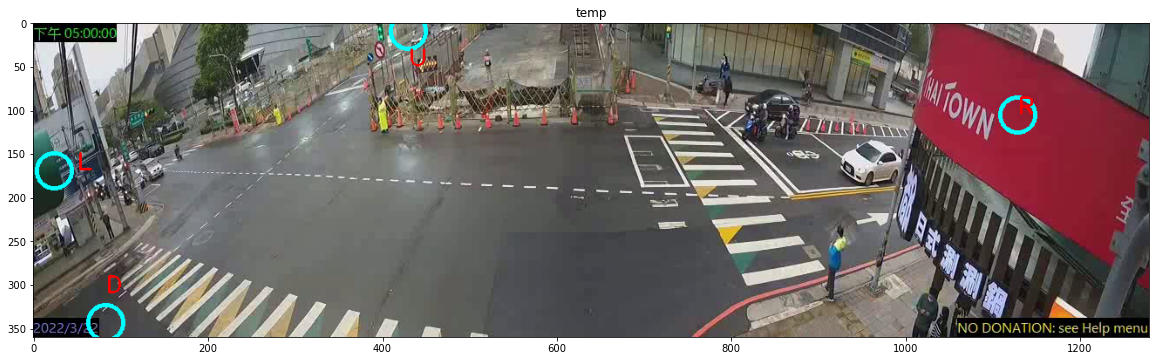

In [26]:
#抓出四個路口

#依序放 右、左、上、下
rightIn = []
leftIn = []
upIn = []
downIn = []

#決定上方路口後，順時針找接下來的路口

def getAngle(v1, v2):
    #向量求夾角，來源 https://www.it145.com/9/94136.html
    x1 = v1[0]
    y1 = v1[1]
    x2 = v2[0]
    y2 = v2[1]
    theta = np.arctan2(x1 * y2 - y1 * x2, x1 * x2 + y1 * y2)
    return theta * 180 / np.pi

sort_tar = meanRoadArray

centerX = (minStartX + maxStartX) / 2
centerY = (minStartY + maxStartY) / 2
for i in range(len(sort_tar)):
    v1 = [-1, 0]
    v2 = [sort_tar[i][0] - centerX, sort_tar[i][1] - centerY]
    sort_tar[i].append(getAngle(v1, v2))
#Y最小的為 upIn
sort_tar = sorted(sort_tar, key = lambda s: s[1], reverse = False)
upIn = sort_tar[0]

for i in range(len(sort_tar)):
    if sort_tar[i][2] < upIn[2]:
        sort_tar[i][2] += 360

sort_tar = sorted(sort_tar, key = lambda s: s[2], reverse = False)

rightIn = sort_tar[1]
downIn = sort_tar[2]
leftIn = sort_tar[3]

#print(sort_tar)
#del sort_tar[0]



print(rightIn)
print(leftIn)
print(upIn)
print(downIn)

if debug_show_image:
    #Show 圖用
    mat = cv2.imread("output/temp%d.png" % cameraNo)
    x = rightIn[0]
    y = rightIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "R" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = leftIn[0]
    y = leftIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "L" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = upIn[0]
    y = upIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "U" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = downIn[0]
    y = downIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "D" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)

    imshow("temp", mat)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()


In [27]:
#把座標資訊寫成csv

trackDataPath = "data/road_camera%d.csv" % cameraNo
file = open(trackDataPath, 'w')
file.write(str(rightIn[0]) + "," + str(rightIn[1]) + "\n")
file.write(str(leftIn[0]) + "," + str(leftIn[1]) + "\n")
file.write(str(upIn[0]) + "," + str(upIn[1]) + "\n")
file.write(str(downIn[0]) + "," + str(downIn[1]) + "\n")
file.close()


In [28]:
#對終點分類
#首先各類別分別放到不同array
countingList = []
for i in range(n):
    countingList.append([])
predictY_endPoint = modelEnd.predict(X_endPoint)

for i in range(len(predictY_endPoint)):
    tarE = predictY_endPoint[i]
    end_xc = X_endPoint[i][0]
    end_yc = X_endPoint[i][1]
    if end_xc == 0 and end_yc == 0:
        continue
    countingList[tarE].append(X_endPoint[i])

In [29]:
#各類別刪除10%離群值
#終點距離差距過大
for i in range(len(countingList)):    
    sort_tar = sorted(countingList[i], key = lambda s: s[0]*s[0]+s[1]*s[1])
    delNum = len(sort_tar) // 10
    for j in range(delNum):
        del sort_tar[0]
        del sort_tar[len(sort_tar) - 1]
    countingList[i] = sort_tar

In [30]:
#抓數量前4名的類別
itemNum = []
for i in range(len(countingList)):
    itemNum.append(len(countingList[i]))
print(itemNum)
sort_itemNum = sorted(itemNum,reverse = True)
print(sort_itemNum)
N = 4
maxN = []
i = 0
while i < N:    
    tarNum = sort_itemNum[i]
    for j in range(len(countingList)):
        if len(countingList[j]) == tarNum:
            maxN.append(j)
            i += 1
print(maxN)

[17, 104, 28, 120, 93, 36, 73, 16]
[120, 104, 93, 73, 36, 28, 17, 16]
[3, 1, 4, 6]


In [31]:
#各類別算平均值
meanRoadArrayEnd = []
for i in range(len(maxN)):
    target = countingList[maxN[i]]
    target = np.array(target)
    if len(target) == 0:
        meanRoadArrayEnd.append([0, 0])
        continue
    #print(target)
    #print(np.mean(target, axis=0))
    tagetMean = np.mean(target, axis=0)
    #最後需要的是轉彎參數的閾值，所以只需要抓tagetMean[6]，然後不需要正負號所以加abs
    meanRoadArrayEnd.append([tagetMean[0], tagetMean[1]])
print(meanRoadArrayEnd)

[[12.614472, 324.76987], [1131.0, 176.60448], [450.5121, 9.0], [11.0, 155.43948]]


[1131.0, 176.60448, 180.06184636317298]
[11.0, 155.43948, 362.10268197954684]
[450.5121, 9.0, 54.19013478224968]
[12.614472, 324.76987, 345.08131892991173]


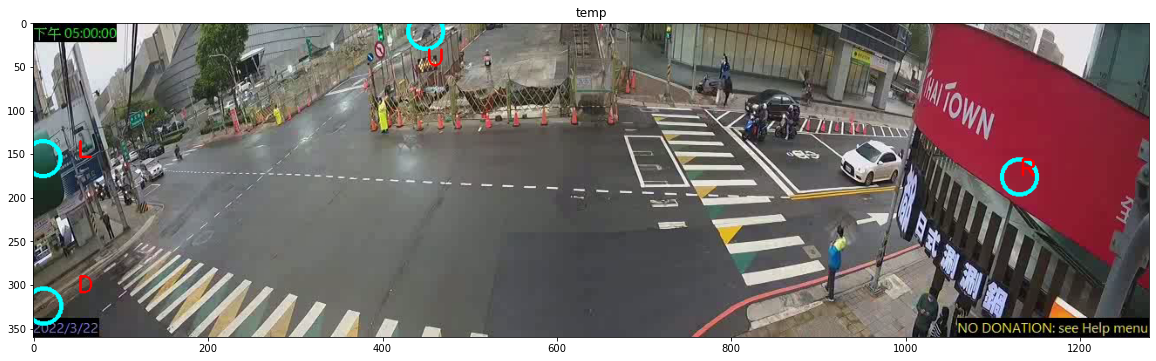

In [32]:
#抓出四個路口

#依序放 右、左、上、下
rightIn = []
leftIn = []
upIn = []
downIn = []

#定上方路口後，順時針找接下來的路口

def getAngle(v1, v2):
    #向量求夾角，來源 https://www.it145.com/9/94136.html
    x1 = v1[0]
    y1 = v1[1]
    x2 = v2[0]
    y2 = v2[1]
    theta = np.arctan2(x1 * y2 - y1 * x2, x1 * x2 + y1 * y2)
    return theta * 180 / np.pi

sort_tar = meanRoadArrayEnd

centerX = (minEndX + maxEndX) / 2
centerY = (minEndY + maxEndY) / 2
for i in range(len(sort_tar)):
    v1 = [-1, 0]
    v2 = [sort_tar[i][0] - centerX, sort_tar[i][1] - centerY]
    sort_tar[i].append(getAngle(v1, v2))
#Y最小的為 upIn
sort_tar = sorted(sort_tar, key = lambda s: s[1], reverse = False)
upIn = sort_tar[0]

for i in range(len(sort_tar)):
    if sort_tar[i][2] < upIn[2]:
        sort_tar[i][2] += 360

sort_tar = sorted(sort_tar, key = lambda s: s[2], reverse = False)

rightIn = sort_tar[1]
downIn = sort_tar[2]
leftIn = sort_tar[3]
#print(sort_tar)
#del sort_tar[0]



print(rightIn)
print(leftIn)
print(upIn)
print(downIn)

if debug_show_image:
    mat = cv2.imread("output/temp%d.png" % cameraNo)
    x = rightIn[0]
    y = rightIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "R" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = leftIn[0]
    y = leftIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "L" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = upIn[0]
    y = upIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "U" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    x = downIn[0]
    y = downIn[1]
    cv2.circle(mat, (x, y), 20, (255, 255, 0), 3)
    x = max(x, 50)
    y = max(y, 50)
    cv2.putText(mat, "D" , (min(x, img_w - 50), min(y, img_h-50)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)

    imshow("temp", mat)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()


In [33]:
#把座標資訊寫成csv

trackDataPath = "data/road_end_camera%d.csv" % cameraNo
file = open(trackDataPath, 'w')
file.write(str(rightIn[0]) + "," + str(rightIn[1]) + "\n")
file.write(str(leftIn[0]) + "," + str(leftIn[1]) + "\n")
file.write(str(upIn[0]) + "," + str(upIn[1]) + "\n")
file.write(str(downIn[0]) + "," + str(downIn[1]) + "\n")
file.close()